***Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can.
Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?***

***Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.***

***Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice? Based on the work you've done, choose a scaling method for your dataset.***

***Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each.***

***Be sure to only learn the parameters for scaling from your training data!***

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import pandas as pd
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from telco_wrangle import wrangle_telco

In [2]:
df = wrangle_telco()
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


***Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?***

In [3]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123)

train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [4]:
def split_data(df):
    '''
    split data into train validate and test   
    '''
    
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)

    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    
    return train, validate, test

In [5]:
train, validate, test = split_data(df)

In [6]:
train.shape

(949, 4)

In [7]:
validate.shape

(407, 4)

In [8]:
test.shape

(339, 4)

In [9]:
x_train = train[['customer_id','monthly_charges','tenure']]
y_train = train[['total_charges']]


In [10]:
x_train.head()

,customer_id,monthly_charges,tenure
1256,7501-IWUNG,73.80,61
225,1303-SRDOK,69.05,55
662,3967-VQOGC,24.90,67
628,3777-XROBG,19.55,58
824,5075-JSDKI,24.45,59


In [11]:
y_train.head()

,total_charges
1256,4616.05
225,3842.6
662,1680.25
628,1079.65
824,1493.1


In [17]:
mc = train[['monthly_charges']]
mc.head()

,monthly_charges
1256,73.80
225,69.05
662,24.90
628,19.55
824,24.45


In [18]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.

scaler.fit(mc)
mc_scaled_train = scaler.transform(mc)



In [22]:
plt.hist(mc, bins=25, ec='black')
plt.title('Original')

Text(0.5, 1.0, 'Original')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fbda197a290> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fbda1a06c20> (for post_execute):


KeyboardInterrupt: 

Text(0.5, 1.0, 'Scaled')

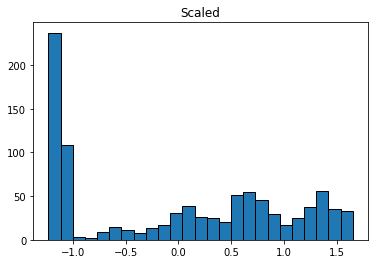

In [21]:
plt.hist(mc_scaled_train, bins=25, ec='black')
plt.title('Scaled')

In [23]:
tenure = train[['tenure']]
tenure.head()

,tenure
1256,61
225,55
662,67
628,58
824,59


In [28]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.

scaler.fit(tenure)
tenure_scaled_train = scaler.transform(tenure)

Text(0.5, 1.0, 'Scaled')

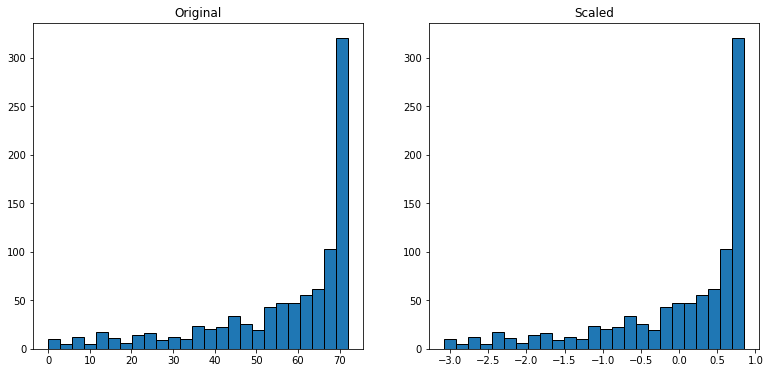

In [32]:
plt.figure(figsize=(13, 6))

plt.subplot(121)
plt.hist(tenure.tenure, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(tenure_scaled_train, bins=25, ec='black')
plt.title('Scaled')